In [20]:
import tensorflow as tf
from keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [21]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [22]:
x_test.shape

(10000, 32, 32, 3)

In [23]:
y_train.shape

(50000, 1)

In [24]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [25]:
y_train = y_train.reshape(-1, )
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [26]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [27]:
classes[9]

'truck'

In [28]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

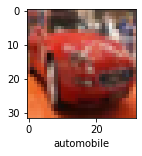

In [29]:
plot_sample(x_train, y_train, 5)

In [30]:
x_train = x_train/255.0
x_test = x_test/255.0

In [31]:
ann = models.Sequential([   #this is the code for an artificial neural network
        layers.Flatten(input_shape=(32,32,3)), #first layer that will accept data of dimension 32*32*3
        layers.Dense(3000, activation='relu'), #second layer, with 3000 neurons and using the activation function rel-u
        layers.Dense(1000, activation='relu'), #third layer, with 1000 neurons and using the activation function rel-u
        layers.Dense(10, activation='softmax') #fourth layer is the output layer, as there are 10 categories, it has 10 neurons,
                                               #and the activation function used is softmax function
    ])

ann.compile(optimizer='SGD',    #The optimizer used is Stochastic Gradient Descent.
              loss='sparse_categorical_crossentropy', #this is the loss function (like 'mean square error'), when 'y' is 1-hot-encoded, 
                                                      #then we use categorical_crossentropy, else we use sparse_categorical_crossentropy (y is in the form 0-9)
              metrics=['accuracy'])                   #Metrics are used to monitor and measure the performance of a model. 
                                                      #Here the performace of the NN is measured by calculating the accuracy.

ann.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 111s 71ms/step - loss: 1.8129 - accuracy: 0.3545
Epoch 2/5
1563/1563 [==============================] - 115s 73ms/step - loss: 1.6225 - accuracy: 0.4275
Epoch 3/5
1563/1563 [==============================] - 101s 65ms/step - loss: 1.5425 - accuracy: 0.4538
Epoch 4/5
1563/1563 [==============================] - 101s 65ms/step - loss: 1.4816 - accuracy: 0.4773
Epoch 5/5
1563/1563 [==============================] - 102s 65ms/step - loss: 1.4313 - accuracy: 0.4962


In [32]:
ann.evaluate(x_test, y_test)

313/313 [==============================] - 9s 27ms/step - loss: 1.4727 - accuracy: 0.4677


[1.4726941585540771, 0.4677000045776367]

In [33]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.35      0.46      1000
           1       0.46      0.80      0.58      1000
           2       0.36      0.34      0.35      1000
           3       0.39      0.18      0.24      1000
           4       0.50      0.29      0.37      1000
           5       0.41      0.37      0.39      1000
           6       0.36      0.78      0.49      1000
           7       0.63      0.49      0.55      1000
           8       0.56      0.67      0.61      1000
           9       0.60      0.41      0.48      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.45     10000
weighted avg       0.49      0.47      0.45     10000



In [40]:
cnn = models.Sequential([
                         layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
                         layers.MaxPooling2D((2,2)),

                         layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
                         layers.MaxPooling2D((2,2)),

                         layers.Flatten(),
                         layers.Dense(64, activation='relu'),
                         layers.Dense(10, activation='softmax')
])

In [42]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [43]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 139s 88ms/step - loss: 1.4839 - accuracy: 0.4680
Epoch 2/10
1563/1563 [==============================] - 139s 89ms/step - loss: 1.1031 - accuracy: 0.6131
Epoch 3/10
1563/1563 [==============================] - 138s 88ms/step - loss: 0.9688 - accuracy: 0.6625
Epoch 4/10
1563/1563 [==============================] - 139s 89ms/step - loss: 0.8819 - accuracy: 0.6935
Epoch 5/10
1563/1563 [==============================] - 139s 89ms/step - loss: 0.8180 - accuracy: 0.7158
Epoch 6/10
1563/1563 [==============================] - 138s 88ms/step - loss: 0.7682 - accuracy: 0.7328
Epoch 7/10
1563/1563 [==============================] - 139s 89ms/step - loss: 0.7207 - accuracy: 0.7481
Epoch 8/10
1563/1563 [==============================] - 138s 88ms/step - loss: 0.6762 - accuracy: 0.7632
Epoch 9/10
1563/1563 [==============================] - 138s 88ms/step - loss: 0.6444 - accuracy: 0.7747
Epoch 10/10
1563/1563 [==============================] 

In [44]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 11s 34ms/step - loss: 0.9408 - accuracy: 0.6884


[0.9408311247825623, 0.6883999705314636]

In [45]:
y_pred=cnn.predict(x_test)

In [46]:
y_pred[:5]

array([[2.5744038e-03, 1.0112454e-02, 9.2422049e-03, 6.5422833e-01,
        1.5957862e-04, 1.5817067e-02, 1.0539292e-02, 3.0399745e-04,
        2.9652268e-01, 4.9993891e-04],
       [2.9220660e-03, 1.1067229e-02, 4.0387799e-06, 2.6504324e-06,
        3.8970219e-07, 1.2657318e-07, 4.2811070e-07, 2.0072474e-07,
        9.8177379e-01, 4.2291596e-03],
       [5.6905288e-02, 9.4508834e-02, 2.0657389e-03, 2.3572549e-02,
        5.2075279e-03, 1.4407538e-03, 2.7287095e-03, 2.6886720e-02,
        5.4484099e-01, 2.4184297e-01],
       [4.0852743e-01, 1.0918516e-03, 2.4219850e-02, 1.4471133e-04,
        7.9862038e-03, 5.7361544e-06, 2.4646448e-05, 1.5135778e-02,
        5.4272401e-01, 1.3981618e-04],
       [1.2123431e-07, 2.6625119e-06, 6.9424654e-03, 4.5996144e-02,
        1.7674701e-02, 2.8868970e-03, 9.2648566e-01, 7.7256396e-07,
        1.0253221e-05, 2.4280033e-07]], dtype=float32)

In [47]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [48]:
y_test = y_test.reshape(-1,)

In [49]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

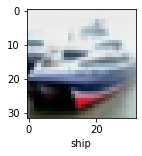

In [50]:
plot_sample(x_test, y_test, 1)

In [51]:
np.argmax([16, 45, 33, 22]) #returns index of the largest element

1

In [52]:
y_classes = [np.argmax(element) for element in y_pred]  #computing argmax for all elements of y_pred

In [53]:
y_classes[:5]

[3, 8, 8, 8, 6]

In [55]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

array([3, 8, 8, 0, 6], dtype=uint8)

Now you can see that y_classes (that contains the labels of x_test images predicted by the model) and y_test have very little difference.

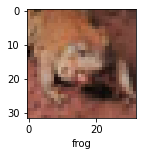

In [58]:
plot_sample(x_test, y_test, 5)

In [59]:
classes[y_classes[5]]

'frog'

In [60]:
print("classification report \n", classification_report(y_test, y_classes))

classification report 
               precision    recall  f1-score   support

           0       0.77      0.68      0.72      1000
           1       0.87      0.78      0.82      1000
           2       0.67      0.51      0.58      1000
           3       0.52      0.53      0.53      1000
           4       0.63      0.59      0.61      1000
           5       0.65      0.54      0.59      1000
           6       0.77      0.75      0.76      1000
           7       0.57      0.86      0.69      1000
           8       0.79      0.82      0.80      1000
           9       0.72      0.83      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000

